# Task 4
## Part 1: Discrete Map

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import show, scatter, xlim, ylim

### Creating discrete map function

In [11]:
def logisticmap(x, r):
    """
    Function computes the logistic map
    :param x: x_n value
    :param r: growth rate 
    :return: x_n+1 value
    """
    return x * r * (1 - x)

Initializing the values

In [3]:
seed = 0.1          # Initial value for x in (0, 1)    
iterations = 1000   # Number of iterations per point

# Initialize r and x lists
rlist = []
xlist = []
# Interval (0, 4) for the r values
start = 0
stop = 4
step_size = 0.001
# Sample r values
rs = np.linspace(start, stop, int((stop - start) / step_size + 1))
x = step_size + np.zeros(len(rs))

Defining Iteration function for logistic map

In [9]:
def iterate(n, x, r):
    """
    This function computes nth iteration of the logistic map
    :param n: iteration/index
    :param x: x_n value
    :param r: growth rate 
    :return: x_n+1 value
    """
    for i in range(n):
        x = logisticmap(x, r)
    return x

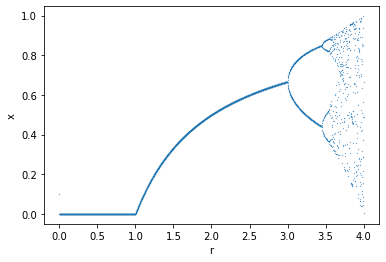

In [7]:
# Generate list values (iterate for each value of r)
for idx, ri in enumerate(rs):
    rlist.append(ri) 
    xlist.append(iterate(idx, seed, ri))  
        
plt.scatter(rlist, xlist, s = .02)
plt.xlabel("r")
plt.ylabel("x")
plt.savefig("task_4_bifurcation_logistic_map.png")
show()

Graphical representation of logistic map function

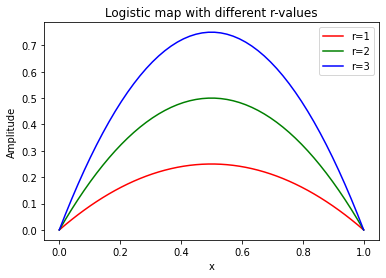

In [13]:
x = np.linspace(0, 1)
fig, (ax) = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(x, logisticmap(x, 1), color='r')
ax.plot(x, logisticmap(x, 2), color='g')
ax.plot(x, logisticmap(x, 3), color='b')
ax.set_title('Logistic map with different r-values')
ax.set_xlabel('x')
ax.set_ylabel('Amplitude')
plt.legend(["r=1", "r=2", "r=3"])
plt.savefig("task_4_logistic_map_diff_r_values.png")

In [14]:
# Iterate the function for a given growth rate, and plot the results.
def logistic_equation_orbit(x0, r, iterations, ax=None):
    """
    This function computes the logistic map for a given r over a number of iterations
    :param x0: initial x value
    :param r: growth rate 
    :param iterations: iteration of the sequence 
    :return: none
    """
    X = []
    N = []
    x = x0
    
    # Iterate the logistic equation
    for step in range(iterations):
        X.append(x)
        N.append(step)
        x = logisticmap(x,r);
        
    ax.plot(N, X)
    ax.set_ylim(0, 1)
    ax.set_xlim(0, len(N))
    ax.set_xlabel('Iterations')
    ax.set_ylabel('X')
    ax.set_title(f"Orbit for $r={r}, \, x_0={x0}$")
    plt.savefig("task_4_logistic_map_orbits.png")



Plotting of orbits for different values of r

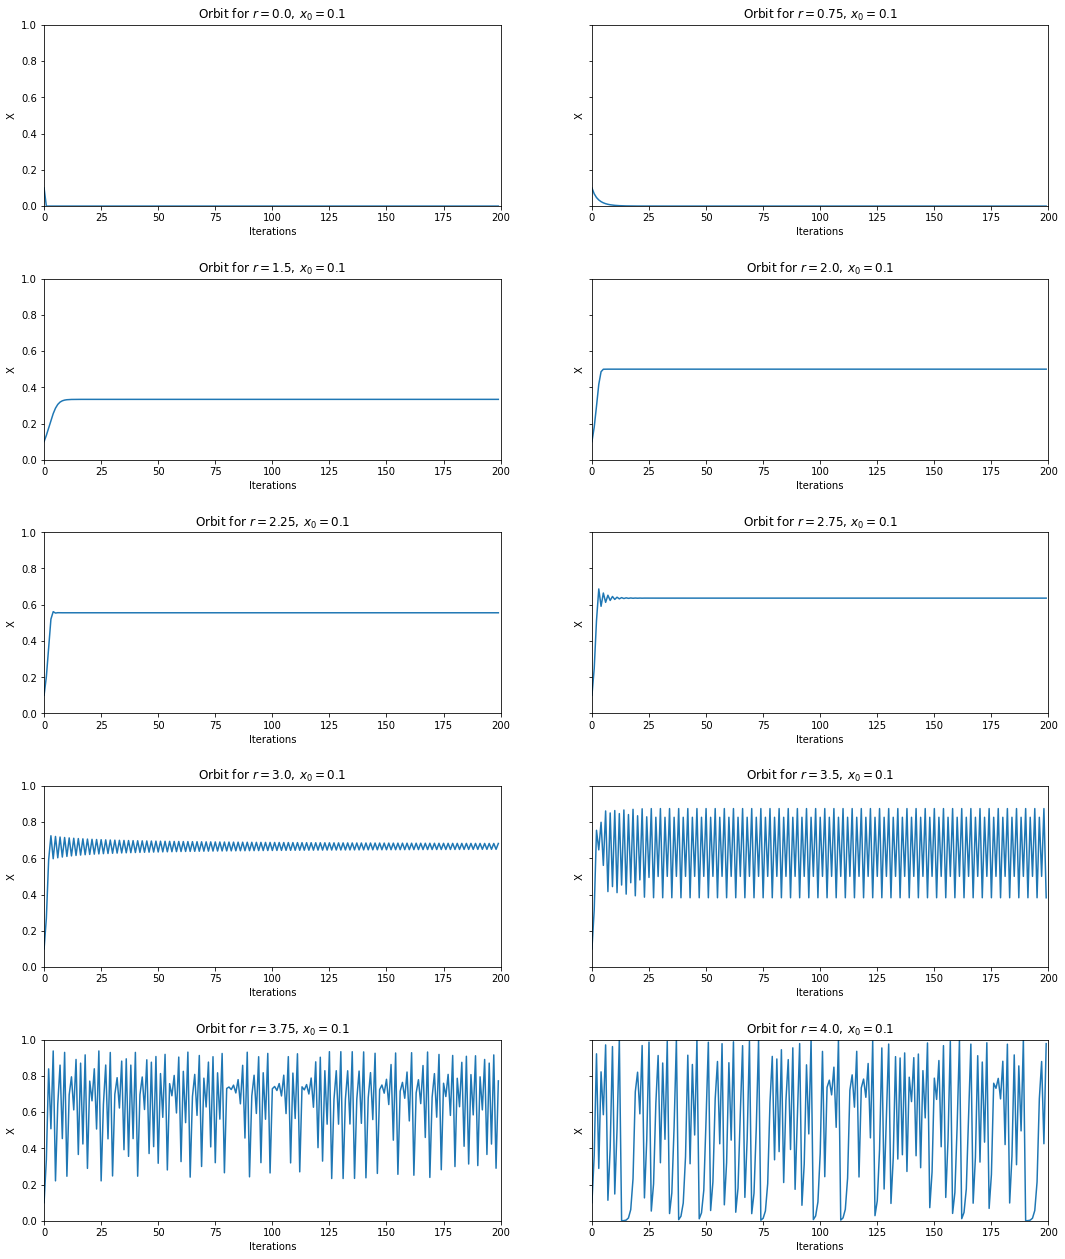

In [15]:
rows, cols = 5, 2
fig, axs = plt.subplots(rows, cols, figsize=(18, 22), sharey=True)
plt.subplots_adjust(hspace=0.4)

x0=0.1
iterations = 200
row = 0
col = 0
ri_list = [0.0, 0.75, 1.5, 2.0, 2.25, 2.75, 3.0, 3.5, 3.75, 4.0]
ri_counter = 0

if (rows*cols)!=len(ri_list):
    raise Exception("Images in Subplot do not fit with R-values")

for row in range(rows):
    for col in range(cols):
        logistic_equation_orbit(x0, ri_list[ri_counter], iterations, axs[row, col])
        ri_counter +=1